# Flight Price Prediction 
**OBJECTIVE:**
* Predict flight ticket prices based on date, destination, and other factors. 

**DATA COLLECTION:**
* Data is collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal.

In [510]:
#imported necessary library function and datasets for this project 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('Clean_Dataset.csv')

In [511]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [512]:
#to ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# DATA CLEANING

In [513]:
df.info()
df.head()

#no missing values found and datatypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**duplicates**

In [514]:
df.duplicated().sum()
#no duplicate values

np.int64(0)

**renaming columns**

In [515]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

**converting duration into minutes**

In [516]:
# Convert decimal hours to total minutes
df['duration_converted'] = (df['duration'] * 60).astype(int)

# Display result
print(df[['duration_converted', 'duration']].head())


   duration_converted  duration
0                 130      2.17
1                 139      2.33
2                 130      2.17
3                 135      2.25
4                 139      2.33


In [517]:
df.drop(['duration'],axis=1,inplace=True)

In [518]:
df.rename(columns={'duration_converted':'duration'},inplace=True)

In [519]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

In [520]:
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,139
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,139


**after removal of outlier**

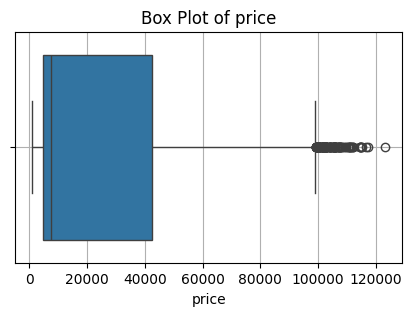

In [521]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

In [522]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**checking uniqueness**

In [523]:
df.nunique()

Index               300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
days_left               49
price                12157
duration               475
dtype: int64

In [524]:
df.dtypes

Index                int64
airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
days_left            int64
price                int64
duration             int64
dtype: object

**label encoding for categorical values**

In [525]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_columns = ['airline','flight','source_city', 'destination_city', 'stops', 'departure_time', 'arrival_time', 'class']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Print the DataFrame with encoded categorical columns
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,1408,2,2,2,5,5,1,1,5953,130
1,1,4,1387,2,1,2,4,5,1,1,5953,139
2,2,0,1213,2,1,2,1,5,1,1,5956,130
3,3,5,1559,2,4,2,0,5,1,1,5955,135
4,4,5,1549,2,4,2,4,5,1,1,5955,139


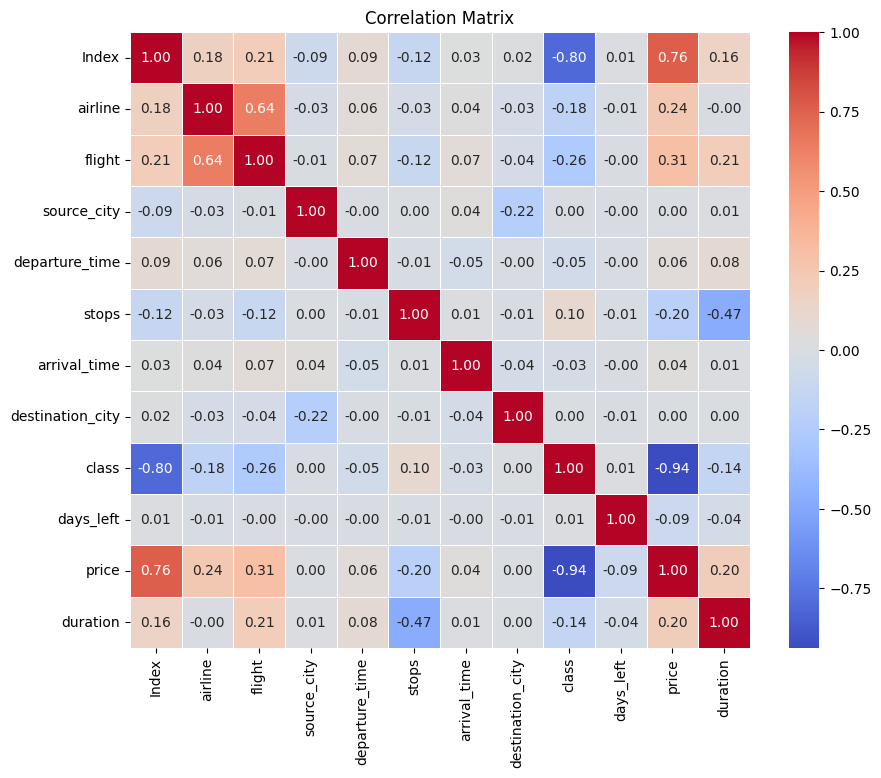

In [526]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with respect to the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



since flight has 1500 categorical values and encoding it is difficult plus its relation with output feature is moderate, so we drop this column

In [527]:
df.drop(['flight'],axis=1,inplace=True)

In [528]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**unique value check garim**

In [529]:
df.nunique()

Index               300153
airline                  6
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
days_left               49
price                12157
duration               475
dtype: int64

In [530]:
df.dtypes

Index               int64
airline             int64
source_city         int64
departure_time      int64
stops               int64
arrival_time        int64
destination_city    int64
class               int64
days_left           int64
price               int64
duration            int64
dtype: object

In [531]:
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,1,5953,130
1,1,4,2,1,2,4,5,1,1,5953,139
2,2,0,2,1,2,1,5,1,1,5956,130
3,3,5,2,4,2,0,5,1,1,5955,135
4,4,5,2,4,2,4,5,1,1,5955,139


In [532]:
#encoded values into new csv file named "cleaned.csv"
df.to_csv("cleaned.csv", index=False)

In [533]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('cleaned.csv')
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,1,5953,130
1,1,4,2,1,2,4,5,1,1,5953,139
2,2,0,2,1,2,1,5,1,1,5956,130
3,3,5,2,4,2,0,5,1,1,5955,135
4,4,5,2,4,2,4,5,1,1,5955,139


# EDA

In [534]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [535]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**graph plotting between features**

In [536]:
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,4,2,2,2,5,5,1,1,5953,130
1,1,4,2,1,2,4,5,1,1,5953,139
2,2,0,2,1,2,1,5,1,1,5956,130
3,3,5,2,4,2,0,5,1,1,5955,135
4,4,5,2,4,2,4,5,1,1,5955,139


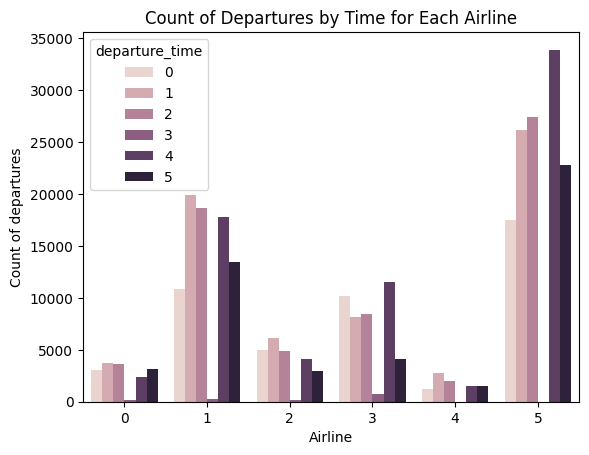

In [537]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='departure_time', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of departures')
plt.title('Count of Departures by Time for Each Airline')   
plt.show()


//comment

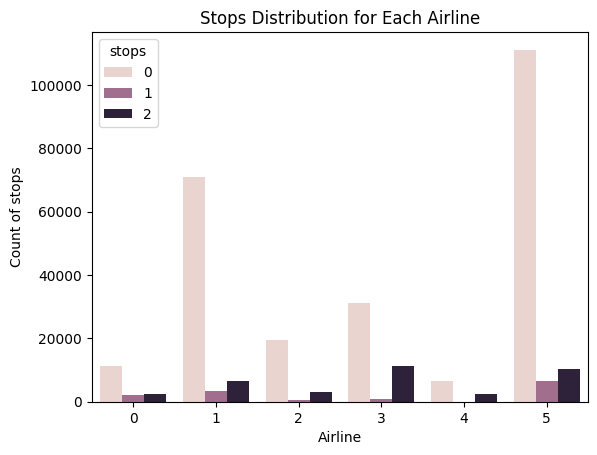

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='stops', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of stops')
plt.title('Stops Distribution for Each Airline')
plt.show()


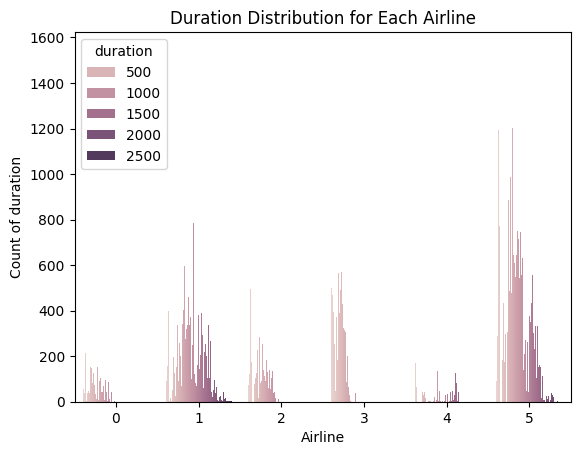

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot (count plot) showing the count of departures by time for each airline
sns.countplot(x='airline', hue='duration', data=df)

plt.xlabel('Airline')
plt.ylabel('Count of duration')
plt.title('Duration Distribution for Each Airline')
plt.show()


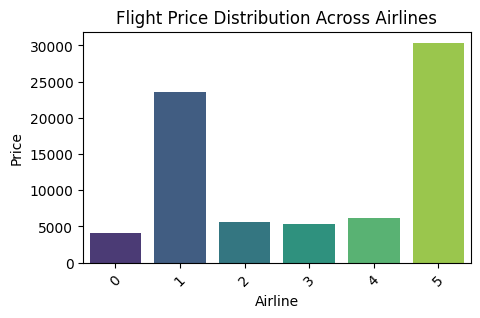

In [540]:
plt.figure(figsize=(5, 3))
sns.barplot(x='airline', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across Airlines")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


In [541]:
df.describe().duration

count    300153.000000
mean        732.934870
std         431.519185
min          49.000000
25%         409.000000
50%         675.000000
75%         970.000000
max        2989.000000
Name: duration, dtype: float64

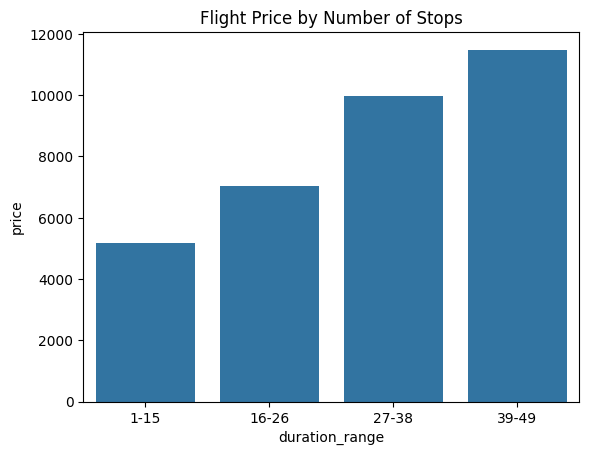

In [542]:
bins = [49, 409, 675,970, 1811]
labels = ['1-15', '16-26', '27-38', '39-49']
df['duration_range'] = pd.cut(df['duration'], bins=bins, labels=labels)

stops_price = df.groupby('duration_range')['price'].median().reset_index()

sns.barplot(x='duration_range', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


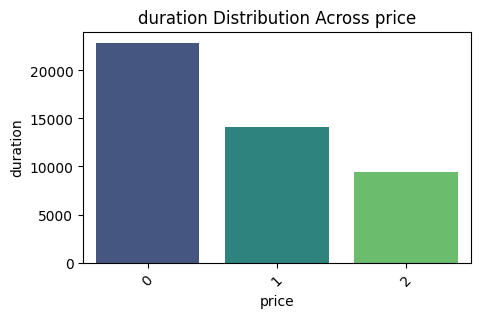

In [543]:
plt.figure(figsize=(5, 3))
sns.barplot(x='stops', y='price', data=df, palette='viridis', ci=None)
plt.title("duration Distribution Across price")
plt.xlabel("price")
plt.ylabel("duration")
plt.xticks(rotation=45)
plt.show()

   stops   price
0      0  7959.0
1      1  8307.0
2      2  4499.0


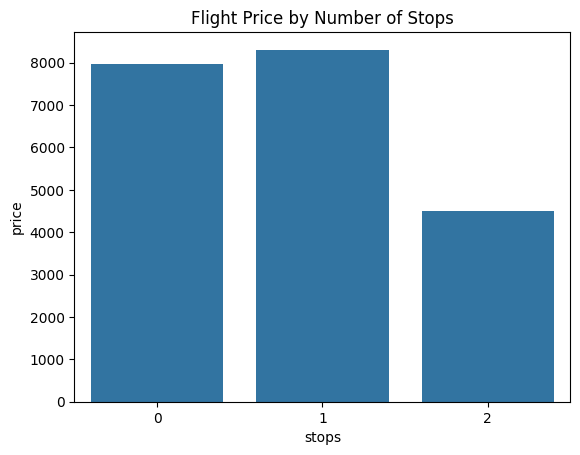

In [544]:
stops_price = df.groupby('stops')['price'].median().reset_index()
print(stops_price)

sns.barplot(x='stops', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


In [545]:
df.describe().days_left

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

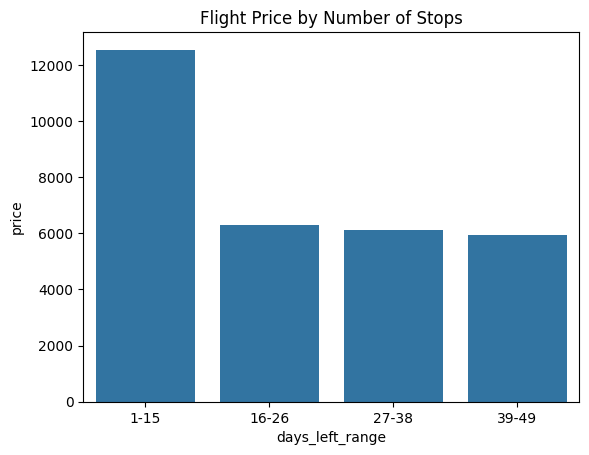

In [546]:
bins = [1, 15, 26, 38, 49]
labels = ['1-15', '16-26', '27-38', '39-49']
df['days_left_range'] = pd.cut(df['days_left'], bins=bins, labels=labels)

stops_price = df.groupby('days_left_range')['price'].median().reset_index()

sns.barplot(x='days_left_range', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


**checking outliers**

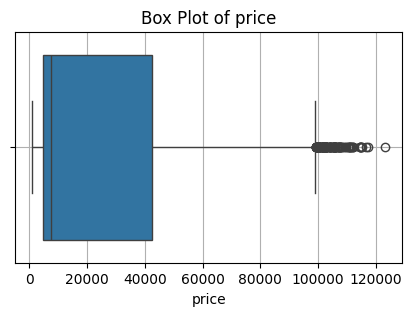

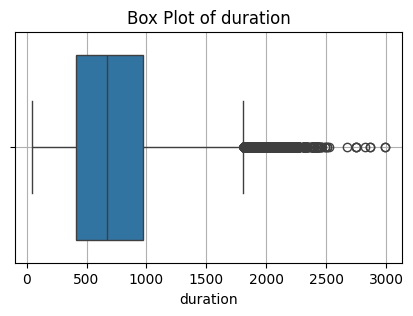

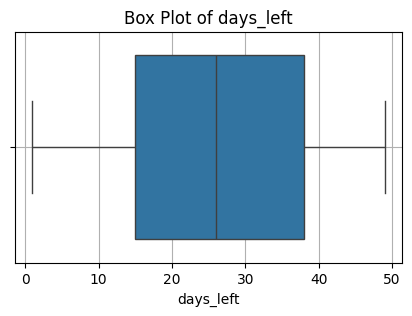

In [547]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['days_left'])
plt.title('Box Plot of days_left')
plt.xlabel('days_left')
plt.grid()
plt.show()

**handling outliers**
- which approach should be followed?


In [548]:
# Step 1: Identify outliers using IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds (values outside 1.5 * IQR are outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Cap the outliers
df['price'] = df['price'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Print after capping outliers

print("\nData after capping outliers:\n", df['price'])


Data after capping outliers:
 0          5953.0
1          5953.0
2          5956.0
3          5955.0
4          5955.0
           ...   
300148    69265.0
300149    77105.0
300150    79099.0
300151    81585.0
300152    81585.0
Name: price, Length: 300153, dtype: float64


In [549]:
# Step 1: Identify outliers using IQR (Interquartile Range)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds (values outside 1.5 * IQR are outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Cap the outliers
df['duration'] = df['duration'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Print after capping outliers

print("\nData after capping outliers:\n", df['duration'])


Data after capping outliers:
 0         130.0
1         139.0
2         130.0
3         135.0
4         139.0
          ...  
300148    604.0
300149    625.0
300150    829.0
300151    600.0
300152    604.0
Name: duration, Length: 300153, dtype: float64


**after removal of outlier**

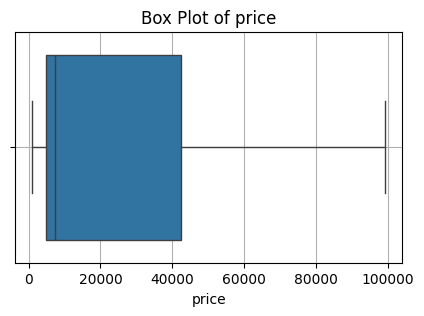

In [550]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

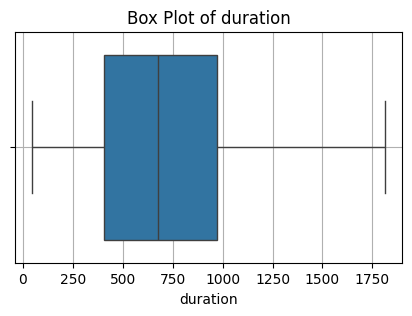

In [551]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

# EDA Task

**1.target variable analysis**

**price binning**
- categorizing price into bins(low,mid,high) to analyze the pattern

In [552]:
df.describe().price

count    300153.000000
mean      20887.402112
std       22689.507652
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max       99128.000000
Name: price, dtype: float64

In [553]:
price_bins = [1105, 4783,42521,123071 ]  
price_labels = ['low', 'middle', 'high']
df['price Group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

print("Dataset after Binning Age:")
print(df[['price', 'price Group']])

Dataset after Binning Age:
          price price Group
0        5953.0      middle
1        5953.0      middle
2        5956.0      middle
3        5955.0      middle
4        5955.0      middle
...         ...         ...
300148  69265.0        high
300149  77105.0        high
300150  79099.0        high
300151  81585.0        high
300152  81585.0        high

[300153 rows x 2 columns]


In [554]:
df['price Group'] = df['price Group'].replace({'low': 0, 'middle': 1, 'high': 2})

In [555]:
df['price Group'] = df['price Group'].astype('category').cat.codes.astype('int64')

In [556]:
df.dtypes

Index                  int64
airline                int64
source_city            int64
departure_time         int64
stops                  int64
arrival_time           int64
destination_city       int64
class                  int64
days_left              int64
price                float64
duration             float64
duration_range      category
days_left_range     category
price Group            int64
dtype: object

**extreme values**
- To identify unusally expensive flights or cheap flights
- done before,unusually expensive flights are seen

**2.categorical feature analysis**

**airplane vs price**

- done before

**premium airline vs budget airline**

In [557]:
df.columns

Index(['Index', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration', 'duration_range', 'days_left_range', 'price Group'],
      dtype='object')

In [558]:
 

median_price = df['price'].median()

avg_prices = df.groupby('airline')['price'].median()

airline_category = avg_prices.apply(lambda x: 'Premium' if x > median_price else 'Budget')

print("Median Ticket Price:", median_price)
print("\nAverage Ticket Price per Airline:\n", avg_prices)
print("\nAirline Classification:\n", airline_category)

Median Ticket Price: 7425.0

Average Ticket Price per Airline:
 airline
0     3276.0
1    11520.0
2     5336.0
3     4453.0
4     5654.0
5    15543.0
Name: price, dtype: float64

Airline Classification:
 airline
0     Budget
1    Premium
2     Budget
3     Budget
4     Budget
5    Premium
Name: price, dtype: object


**class vs price**

   class    price
0      0  53164.0
1      1   5772.0


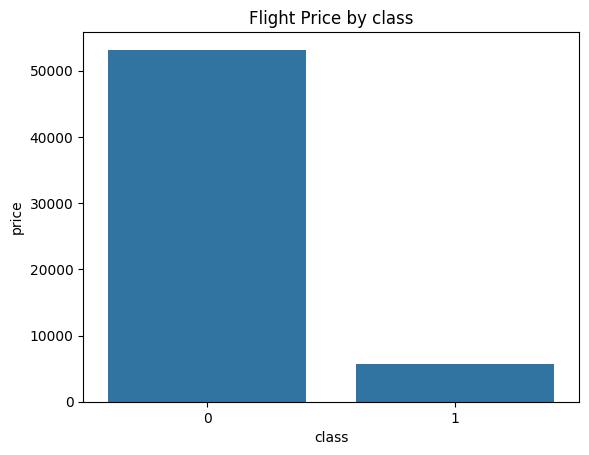

In [559]:
stops_price = df.groupby('class')['price'].median().reset_index()
print(stops_price)

sns.barplot(x='class', y='price', data=stops_price)
plt.title('Flight Price by class')
plt.show()

business class price is much greater than economy class

- source and destination cities impact: no different source and destination so this step skipped

**number of stops vs price** 
- done before

**feature engineering**
- Flight Age (days left before departure). (exist)
- Price per Kilometer (if distance data available). (distance data not available)
- Red-Eye Flight Indicator (late-night departures). ( late-night flight that departs late in the evening or at night and arrives the following morning)
- Peak Season Flag (based on month).(not given)

In [560]:
df=df.drop(columns=['days_left_range'],axis=1)
df=df.drop(columns=['duration_range'],axis=1)
df

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration,price Group
0,0,4,2,2,2,5,5,1,1,5953.0,130.0,1
1,1,4,2,1,2,4,5,1,1,5953.0,139.0,1
2,2,0,2,1,2,1,5,1,1,5956.0,130.0,1
3,3,5,2,4,2,0,5,1,1,5955.0,135.0,1
4,4,5,2,4,2,4,5,1,1,5955.0,139.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1,4,0,2,3,0,49,69265.0,604.0,2
300149,300149,5,1,0,0,5,3,0,49,77105.0,625.0,2
300150,300150,5,1,1,0,5,3,0,49,79099.0,829.0,2
300151,300151,5,1,1,0,2,3,0,49,81585.0,600.0,2


**skewness before scaling**

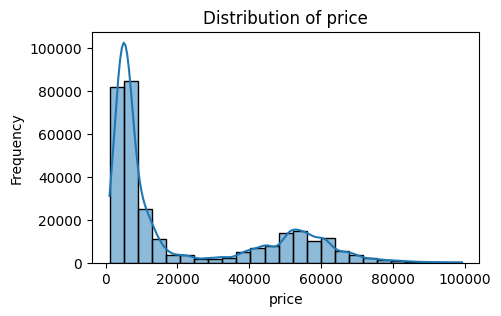

In [561]:
plt.figure(figsize=(5, 3)) # Figsize(width, height)
sns.histplot(data=df["price"], bins=25, kde=True) 
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


q. when normalize and when standardize?

In [562]:
from sklearn.preprocessing import StandardScaler
# standardscaler and z-score normalization is same, here range isnt always 0-1

columns_to_scale = ['duration', 'price', 'days_left']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nScaled DataFrame:")
print(df)


Scaled DataFrame:
         Index  airline  source_city  departure_time  stops  arrival_time  \
0            0        4            2               2      2             5   
1            1        4            2               1      2             4   
2            2        0            2               1      2             1   
3            3        5            2               4      2             0   
4            4        5            2               4      2             4   
...        ...      ...          ...             ...    ...           ...   
300148  300148        5            1               4      0             2   
300149  300149        5            1               0      0             5   
300150  300150        5            1               1      0             5   
300151  300151        5            1               1      0             2   
300152  300152        5            1               4      0             2   

        destination_city  class  days_left     price  du

In [563]:
print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


Skewness value of duration:  0.5523483557437165
Skewness value of price:  1.0588298744874654
Skewness value of days_left:  -0.03546434955066649


In [564]:
df.to_csv("cleaned2.csv", index=False)

In [565]:
df=pd.read_csv('cleaned2.csv')
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration,price Group
0,0,4,2,2,2,5,5,1,-1.843875,-0.658209,-1.406130,1
1,1,4,2,1,2,4,5,1,-1.843875,-0.658209,-1.385097,1
2,2,0,2,1,2,1,5,1,-1.843875,-0.658076,-1.406130,1
3,3,5,2,4,2,0,5,1,-1.843875,-0.658120,-1.394445,1
4,4,5,2,4,2,4,5,1,-1.843875,-0.658120,-1.385097,1


# Model Training


In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [567]:
df = pd.read_csv("cleaned2.csv")
df.head()

,Index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration,price Group
0,0,4,2,2,2,5,5,1,-1.843875,-0.658209,-1.406130,1
1,1,4,2,1,2,4,5,1,-1.843875,-0.658209,-1.385097,1
2,2,0,2,1,2,1,5,1,-1.843875,-0.658076,-1.406130,1
3,3,5,2,4,2,0,5,1,-1.843875,-0.658120,-1.394445,1
4,4,5,2,4,2,4,5,1,-1.843875,-0.658120,-1.385097,1


In [568]:
df.dtypes

Index                 int64
airline               int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
days_left           float64
price               float64
duration            float64
price Group           int64
dtype: object

In [569]:
df["days_left"] = df["days_left"].astype(int) 
df["price"] = df["price"].astype(int) 
df["duration"] = df["duration"].astype(int) 

In [570]:
df.dtypes

Index               int64
airline             int64
source_city         int64
departure_time      int64
stops               int64
arrival_time        int64
destination_city    int64
class               int64
days_left           int64
price               int64
duration            int64
price Group         int64
dtype: object

In [571]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])  # Features
y = df['price'] # Target

preparing data for machine learning by separating features and target before splitting them into training and testing.

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splits our dataset into training and testing sets for a machine learning models

In [573]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

the code is using the linear regression model to learn the relationship between the features in input data and output we are trying to predict

In [574]:
y_pred = model.predict(X_test)

model is making predictions based on the test data we gave it

In [575]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.17580056322049906
Mean Squared Error (MSE): 0.08922873384175921
R² Score: 0.6891498603751793


The code calculates and prints three metrics to measure how well the model's predictions match the actual test data: MAE, MSE, and R² score

# Conclusion
- model is performing well. it can explain 90% of the variation in the data.